# Dataset #1 Preprocessing and Exploration

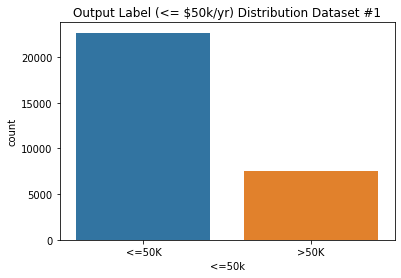

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import seaborn as sns

ds1 = pd.read_csv('./data/adult.data',
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                           'native-country', '<=50k'])
ds1.dropna()
ds1.drop_duplicates()
ds1 = ds1[ds1['workclass'] != '?']
ds1 = ds1[ds1['occupation'] != '?']
ds1 = ds1[ds1['education'] != '?']
ds1 = ds1[ds1['marital-status'] != '?']
ds1 = ds1[ds1['relationship'] != '?']
ds1 = ds1[ds1['race'] != '?']
ds1 = ds1[ds1['sex'] != '?']
ds1 = ds1[ds1['native-country'] != '?']

ax = sns.countplot(x="<=50k", data=ds1).set_title("Output Label (<= $50k/yr) Distribution Dataset #1")

Text(0.5, 1.0, 'Correlation Matrix')

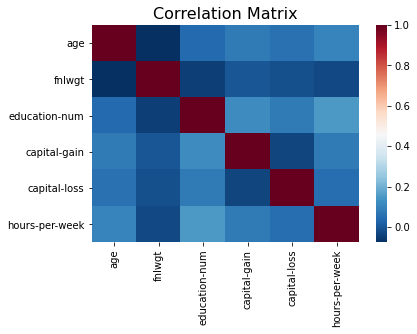

In [2]:
sns.heatmap(ds1.select_dtypes(exclude="object").corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,)

In [3]:
ds1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
<=50k             object
dtype: object

In [4]:
ds1_dummies = pd.get_dummies(ds1, columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
ds1_dummies.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', '<=50k', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=105)

In [5]:
from sklearn.preprocessing import StandardScaler
ds1_dummies.dropna()
ds1_dummies['<=50k'].value_counts()
ds1_dummies['<=50k'] = ds1_dummies['<=50k'].map({'<=50K':1, '>50K': 0})
ds1_labels = ds1_dummies['<=50k']
ds1_dummies = ds1_dummies.drop(['<=50k'], axis=1)
scaler = StandardScaler()
scaled_ds1_dummies = scaler.fit_transform(ds1_dummies, y=ds1_labels)
scaled_ds1_dummies

array([[ 0.04279571, -1.0627216 ,  1.12891838, ...,  0.31087053,
        -0.04611277, -0.02303802],
       [ 0.88028814, -1.00787131,  1.12891838, ...,  0.31087053,
        -0.04611277, -0.02303802],
       [-0.03333996,  0.24469349, -0.4397382 , ...,  0.31087053,
        -0.04611277, -0.02303802],
       ...,
       [ 1.48937355, -0.3585745 , -0.4397382 , ...,  0.31087053,
        -0.04611277, -0.02303802],
       [-1.25151078,  0.11070545, -0.4397382 , ...,  0.31087053,
        -0.04611277, -0.02303802],
       [ 1.0325595 ,  0.92884082, -0.4397382 , ...,  0.31087053,
        -0.04611277, -0.02303802]])

In [6]:
scaled_ds1_dummies.shape

(30162, 104)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_ds1_dummies, ds1_labels, test_size=0.20, stratify=ds1_labels)

print ("number of training samples: ", len(X_train))
print ("number of test samples: ", len(y_test))

number of training samples:  24129
number of test samples:  6033


In [8]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
import numpy as np
pipe_steps = [('scaler', StandardScaler()), ('svm', SVC(C=1.0, degree=3, coef0=0.0, shrinking=True, probability=False, cache_size=200, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=0))]

check_params = {'svm__kernel':['poly', 'rbf', 'sigmoid'], 
                'svm__gamma': ['scale', 'auto'],
                'svm__tol': [0.001, 0.01, 0.1],
                'svm__class_weight': [None, 'balanced']}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=0))])


In [ ]:
from tqdm import tqdm_notebook as tqdm
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


#for cv in tqdm([6,9]):
#    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv, n_jobs=6)
#    create_grid.fit(X_train, y_train)
#    print("score for %d fold CV := %5.4f" %(cv, create_grid.score(X_test, y_test)))
#    print ("!!!! best fit parameters from GridSearchCV !!!!")
#    print (create_grid.best_params_)
    

print ("out o' the loop")
#score for 3 fold CV := 0.8442
#!!!! best fit parameters from GridSearchCV !!!!
#{'svm__class_weight': None, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'svm__tol': 0.1}

"""
score for 6 fold CV := 0.8449
!!!! best fit parameters from GridSearchCV !!!!
{'svm__class_weight': None, 'svm__gamma': 'auto', 'svm__kernel': 'rbf', 'svm__tol': 0.001}
score for 9 fold CV := 0.8449
!!!! best fit parameters from GridSearchCV !!!!
{'svm__class_weight': None, 'svm__gamma': 'auto', 'svm__kernel': 'rbf', 'svm__tol': 0.001}
"""



In [10]:
%%time
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
DecsTree = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='auto', class_weight=None)
DecsTree.fit(X_train, y_train)


y_pred_train = DecsTree.predict(X_train)
y_pred_test = DecsTree.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('training data confusion matrix')
print(conf_matrix_train)
print('testing data confusion matrix')
print(conf_matrix_test)

print('training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

training data confusion matrix
      0      1
0  3703   2303
1  1073  17050
testing data confusion matrix
     0     1
0  889   613
1  302  4229
training accuracy rate: 0.8600853744456878
test accuracy rate: 0.8483341621084037
training error rate: 0.13991462555431222
test error rate: 0.15166583789159627
training matthews_corrcoef Score: 0.604817581656304
test matthews_corrcoef score: 0.5705708278033467
CPU times: user 1min 12s, sys: 325 ms, total: 1min 13s
Wall time: 1min 13s


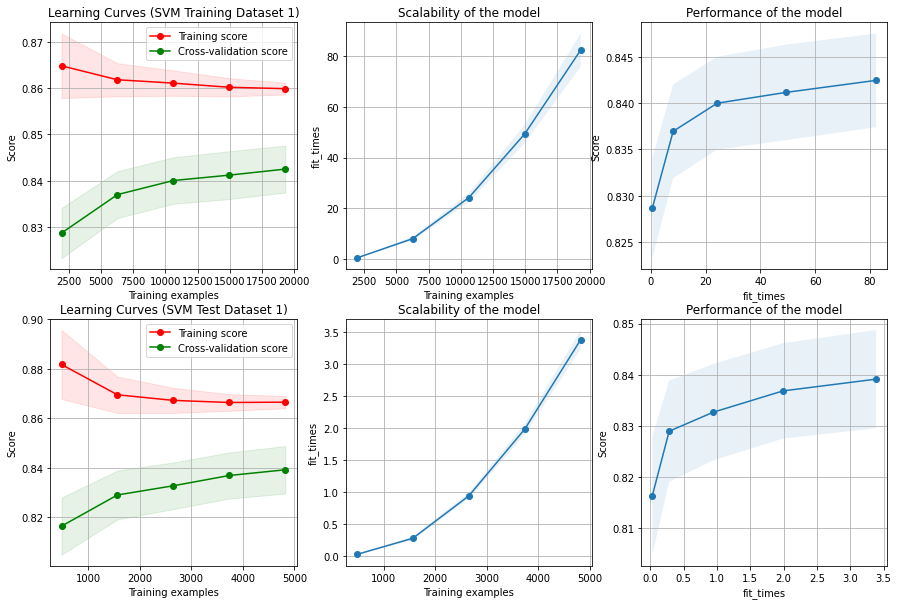

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (SVM Training Dataset 1)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='auto', class_weight=None)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
title = "Learning Curves (SVM Test Dataset 1)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, axes=axes[1, :])



plt.show()



In [13]:
ds2 = pd.read_csv('./data/bank-additional-full.csv', delimiter=';')
ds2.dropna()
ds2.drop_duplicates()
ds2_dummies = pd.get_dummies(ds2, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
ds2_dummies.dropna()
ds2_dummies['y'].value_counts()
ds2_dummies['y'] = ds2_dummies['y'].map({'yes':1, 'no': 0})
ds2_labels = ds2_dummies['y']
ds2_dummies = ds2_dummies.drop(['y'], axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(ds2_dummies, ds2_labels, test_size=0.20, stratify=ds2_labels)
scaler = StandardScaler()
scaled_ds2_dummies = scaler.fit_transform(ds2_dummies, y=ds2_labels)

In [17]:
import math
clfs = []
clfs1 = []
for x in ['rbf']:
    clf = SVC(random_state=0, kernel=x, tol=0.1, gamma='auto', class_weight=None)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    clf = SVC(random_state=0, kernel=x, tol=0.1, gamma='auto', class_weight=None)
    clf.fit(X1_train, y1_train)
    clfs1.append(clf)

In [19]:
for x in ['sigmoid']:
    clf = SVC(random_state=0, kernel=x, tol=0.1, gamma='auto', class_weight=None)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    clf = SVC(random_state=0, kernel=x, tol=0.1, gamma='auto', class_weight=None)
    clf.fit(X1_train, y1_train)
    clfs1.append(clf)

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
train_scores1 = [clf.score(X1_train, y1_train) for clf in clfs1]
test_scores1 = [clf.score(X1_test, y1_test) for clf in clfs1]


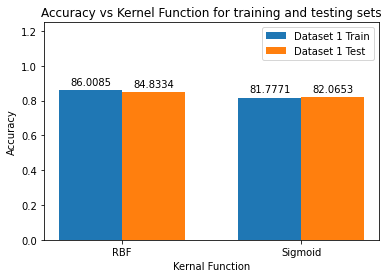

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel("Kernal Function")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Kernel Function for training and testing sets")
labels = ['RBF', 'Sigmoid']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars 

rects = ax.bar(x - width/2, train_scores, width, label='Dataset 1 Train')
rects1 = ax.bar(x + width/2, test_scores, width, label='Dataset 1 Test')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate( "%5.4f" % (height * 100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
autolabel(rects1)
ax.set_ylim((0, 1.25))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

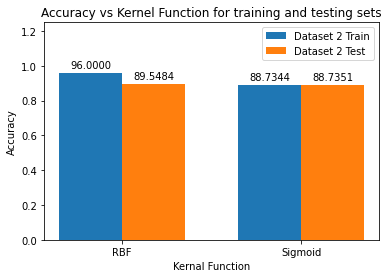

In [35]:
fig, ax = plt.subplots()
ax.set_xlabel("Kernal Function")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Kernel Function for training and testing sets")
labels = ['RBF', 'Sigmoid']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars 

rects = ax.bar(x - width/2, train_scores1, width, label='Dataset 2 Train')
rects1 = ax.bar(x + width/2, test_scores1, width, label='Dataset 2 Test')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate( "%5.4f" % (height * 100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
autolabel(rects1)
ax.set_ylim((0, 1.25))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()